In [1]:
import tensorflow as tf
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
import json
from imblearn.over_sampling import ADASYN
import numpy as np
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, chi2,f_classif
from scipy.stats import pearsonr
from collections import Counter
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.preprocessing import LabelEncoder
import joblib


In [2]:
df =pd.read_csv("../cervical-cancer_csv.csv")

In [3]:
df=df.dropna(subset=["Biopsy"])


In [4]:
X = df.drop('Biopsy', axis=1,inplace=False)
y = df['Biopsy']

In [5]:
numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns

numeric_transformer = SimpleImputer(strategy='mean')
categorical_transformer = SimpleImputer(strategy='most_frequent')

# Create the ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Fit and transform the data
df = pd.DataFrame(preprocessor.fit_transform(X), columns=X.columns)
df=pd.concat([df, y.reset_index(drop=True)], axis=1)



In [6]:
# Remove duplicate rows
df = df.drop_duplicates()
df.drop(['STDs: Time since first diagnosis', 'STDs: Time since last diagnosis'], axis=1, inplace=True)
categorical_cols = df.select_dtypes(include=['object', 'bool']).columns

In [7]:
df["STDs:genital herpes"].unique()
# df["STDs:genital herpes"].values

array([0.        , 0.00136054, 1.        ])

In [8]:

X = df.drop('Biopsy', axis=1)
y = df['Biopsy']

In [9]:
from imblearn.combine import SMOTETomek
smote_tomek = SMOTETomek(random_state=42)
X, y  = smote_tomek.fit_resample(X, y)

In [178]:
# adasyn = ADASYN(random_state=42)
# X, y = adasyn.fit_resample(X, y)

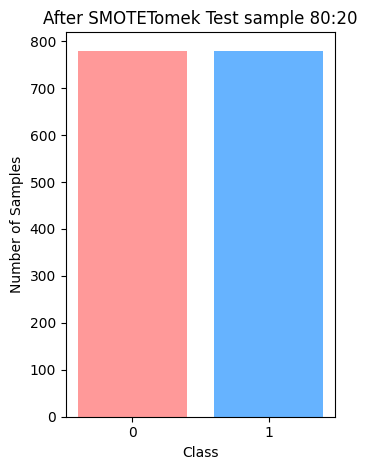

In [10]:
counter_after = Counter(y)
plt.subplot(1, 2, 2)
plt.bar(counter_after.keys(), counter_after.values(), color=['#ff9999','#66b3ff'])
plt.title('After SMOTETomek Test sample 80:20')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.xticks([0, 1])

plt.tight_layout()
plt.show()

In [11]:

# Function to identify if a column is categorical
def is_categorical(col, threshold=10):
    unique_values = len(col.unique())
    if unique_values <= threshold:
        return True
    return False

# Identify categorical and continuous columns
categorical_cols = []
continuous_cols = []

for col in X.columns:
    if is_categorical(X[col]):
        categorical_cols.append(col)
    else:
        continuous_cols.append(col)

# Check dtype for additional information
for col in X.columns:
    if X[col].dtype == 'object' or X[col].dtype == 'bool':
        if col not in categorical_cols:
            categorical_cols.append(col)
    elif X[col].dtype in ['int64', 'float64']:
        if col not in continuous_cols and col not in categorical_cols:
            continuous_cols.append(col)

print(f"Categorical Columns: {categorical_cols}")
print(f"Continuous Columns: {continuous_cols}")


Categorical Columns: ['STDs:cervical condylomatosis', 'STDs:AIDS']
Continuous Columns: ['Age', 'Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)', 'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD', 'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis', 'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis', 'STDs:pelvic inflammatory disease', 'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:HIV', 'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis', 'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller', 'Citology']


In [12]:
scaler = StandardScaler()
X = df.drop('Biopsy', axis=1,inplace=False)
y = df['Biopsy']
X_normalized_df = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
df = pd.concat([X_normalized_df, y.reset_index(drop=True)], axis=1)
scaler_params = {
    'mean': scaler.mean_.tolist(),
    'scale': scaler.scale_.tolist()
}
# Concatenate the normalized features with the target variable

# Save the scaler parameters




Pearson Correlation Test Results:


C:\Users\BoraTech\AppData\Local\Temp\ipykernel_14820\3201966393.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='P-value', y='Feature', data=chi2_df, palette='viridis')


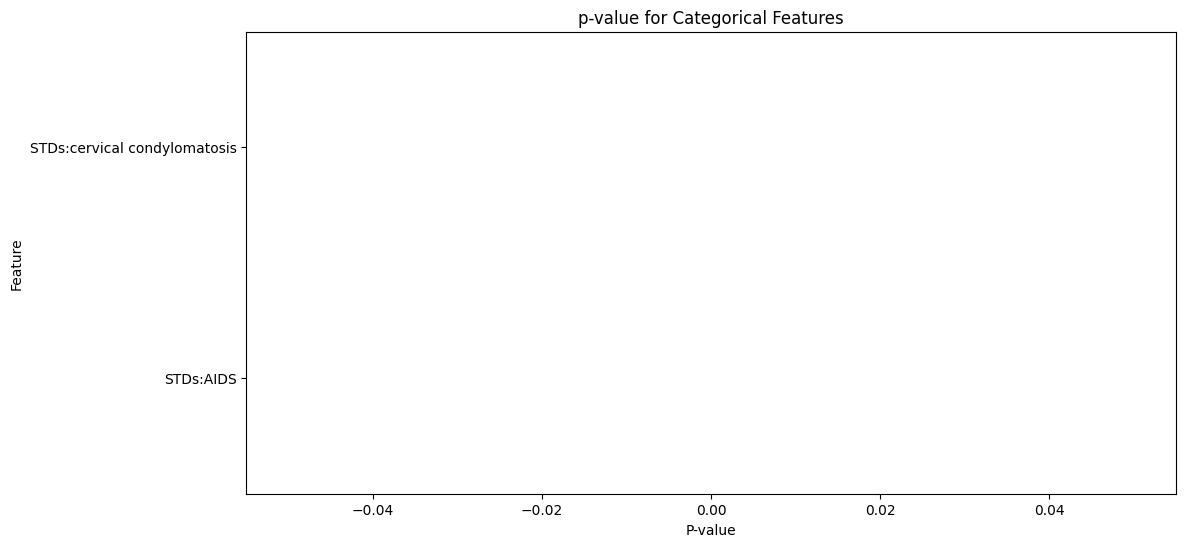

C:\Users\BoraTech\AppData\Local\Temp\ipykernel_14820\3201966393.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='p-value', y='Feature', data=pearson_df, palette='viridis')


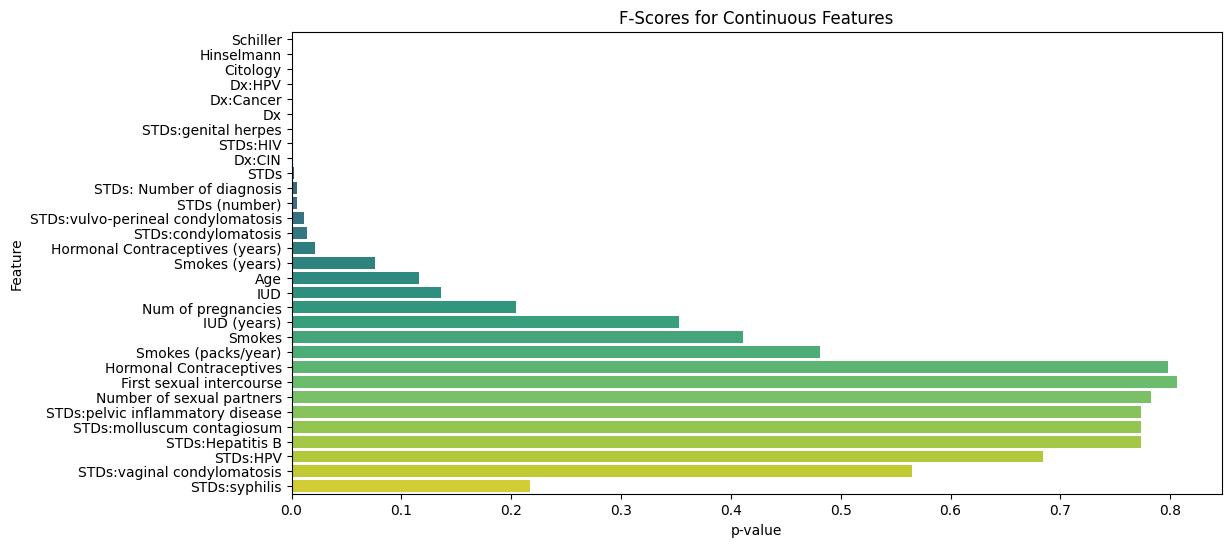

Chi-Square Test Results:
                        Feature  Chi2 Score  p-value
0  STDs:cervical condylomatosis         NaN      NaN
1                     STDs:AIDS         NaN      NaN
Continuous Features: ['Schiller', 'Hinselmann', 'Citology', 'Dx:HPV', 'Dx:Cancer', 'Dx', 'STDs:genital herpes', 'STDs:HIV', 'Dx:CIN', 'STDs', 'STDs: Number of diagnosis', 'STDs (number)', 'STDs:vulvo-perineal condylomatosis', 'STDs:condylomatosis', 'Hormonal Contraceptives (years)', 'Smokes (years)']
Categorical Features: []
after chi-square and correlation 

16
['STDs: Number of diagnosis', 'STDs:condylomatosis', 'Dx', 'Hormonal Contraceptives (years)', 'Hinselmann', 'Dx:Cancer', 'STDs:HIV', 'STDs (number)', 'STDs:vulvo-perineal condylomatosis', 'Smokes (years)', 'STDs:genital herpes', 'STDs', 'Schiller', 'Dx:CIN', 'Dx:HPV', 'Citology']
Column Features: Index(['STDs: Number of diagnosis', 'STDs:condylomatosis', 'Dx',
       'Hormonal Contraceptives (years)', 'Hinselmann', 'Dx:Cancer',
       'STDs:HIV', 

In [13]:
import seaborn as sns

chi2_scores, chi2_pvalues = chi2(X[categorical_cols], y)


# Create DataFrame for feature scores
chi2_df = pd.DataFrame({
    'Feature': categorical_cols,
    'Chi2 Score': chi2_scores,
    'P-value': chi2_pvalues
}).sort_values(by='Chi2 Score', ascending=False)

pearson_results = []
for col in continuous_cols:
    corr, p_value = pearsonr(X[col], y)
    pearson_results.append({'Feature': col, 'Pearson Correlation': corr, 'p-value': p_value})

pearson_df = pd.DataFrame(pearson_results)

print("Pearson Correlation Test Results:")
pearson_df=pearson_df.sort_values(by='Pearson Correlation', ascending=False)

# label_encoders = {}
# for col in categorical_cols:
#     le = LabelEncoder()
#     X[col] = le.fit_transform(X[col].astype(str))
#     label_encoders[col] = le

# Apply Chi-Square test
chi_scores, p_values = chi2(X[categorical_cols], y)

chi2_results = pd.DataFrame({
    'Feature': categorical_cols,
    'Chi2 Score': chi_scores,
    'p-value': p_values
})

plt.figure(figsize=(12, 6))
sns.barplot(x='P-value', y='Feature', data=chi2_df, palette='viridis')
plt.title('p-value for Categorical Features')
plt.show()

# Plot F-Scores
plt.figure(figsize=(12, 6))
sns.barplot(x='p-value', y='Feature', data=pearson_df, palette='viridis')
plt.title('F-Scores for Continuous Features')
plt.show()

print("Chi-Square Test Results:")
chi2_results=chi2_results.sort_values(by='Chi2 Score', ascending=False)
print(chi2_results)
significant_continuous_features = pearson_df[pearson_df['p-value'] < 0.1]['Feature'].tolist()
significant_categorical_features = chi2_results[chi2_results['p-value'] < 0.1]['Feature'].tolist()

print(f"Continuous Features: {significant_continuous_features}")
print(f"Categorical Features: {significant_categorical_features}")

# Combine selected features
selected_features = significant_categorical_features + significant_continuous_features
selected_features = list(set(selected_features))
print(f"after chi-square and correlation \n")
print(f"{len(selected_features)}")
print(f"{selected_features}")
X_selected = X[selected_features]
print(f"Column Features: {X_selected.columns}")

# Standardize the data
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X_selected)

# Apply PCA to retain 97% of the variance
pca = PCA(n_components=0.97)
X_pca = pca.fit_transform(X_standardized)

# Get the principal components and their loadings
components = pca.components_

# Create a DataFrame to hold the loadings
loadings_df = pd.DataFrame(components.T, columns=[f'PC{i+1}' for i in range(components.shape[0])], index=X_selected.columns)
# print("Loadings:")
# print(loadings_df)

# Identify the most influential features for each principal component
influential_features = {}
for i in range(components.shape[0]):
    pc_name = f'PC{i+1}'
    most_influential_feature = loadings_df[pc_name].abs().idxmax()
    influential_features[pc_name] = most_influential_feature

# Rename the principal components based on the most influential features
renamed_pca_components = [influential_features[f'PC{i+1}'] for i in range(components.shape[0])]

# print("\nMost Influential Features:")
for pc, feature in influential_features.items():
    print(f"{pc}: {feature}")

# print("\nRenamed PCA Components:")
# print(renamed_pca_components)

# Create a DataFrame with the renamed components
# renamed_df = pd.DataFrame(X_pca, columns=renamed_pca_components)
# # print("\nPCA Components with Renamed Columns:")
# # print(renamed_df.head())

# df=renamed_df
# df = df.loc[:,~df.columns.duplicated()]
# X=df
# df


In [14]:
X_pca.shape

(835, 11)

In [16]:
X=X_pca


In [17]:
X.shape

(835, 11)

In [18]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

d:\Projects\Python\ML\cervical\venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [20]:
with open('real_model_scaler_params.json', 'w') as f:
    json.dump(scaler_params, f)

In [21]:
# joblib.dump(scaler.mean_, 'scaler_mean.pkl')
# joblib.dump(scaler.scale_, 'scaler_scale.pkl')
# joblib.dump(pca.components_, 'pca_components.pkl')
# joblib.dump(pca.mean_, 'pca_mean.pkl')

import json

# Convert and save the scaler mean and scale
with open('scaler_mean.json', 'w') as f:
    json.dump(scaler.mean_.tolist(), f)

with open('scaler_scale.json', 'w') as f:
    json.dump(scaler.scale_.tolist(), f)

# Convert and save PCA components and mean
with open('pca_components.json', 'w') as f:
    json.dump(pca.components_.tolist(), f)

with open('pca_mean.json', 'w') as f:
    json.dump(pca.mean_.tolist(), f)

In [22]:
model.fit(X, y, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.5087 - loss: 0.7210 - val_accuracy: 0.9461 - val_loss: 0.4920
Epoch 2/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9443 - loss: 0.4801 - val_accuracy: 0.9521 - val_loss: 0.3290
Epoch 3/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9448 - loss: 0.3381 - val_accuracy: 0.9581 - val_loss: 0.2156
Epoch 4/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9573 - loss: 0.2131 - val_accuracy: 0.9701 - val_loss: 0.1493
Epoch 5/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9591 - loss: 0.1607 - val_accuracy: 0.9581 - val_loss: 0.1168
Epoch 6/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9681 - loss: 0.1196 - val_accuracy: 0.9641 - val_loss: 0.1012
Epoch 7/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9739 - loss: 0.0922 - val_accuracy: 0.9641 - val_loss: 0.0941
Epoch 8/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9593 - loss: 0.1092 - val_accuracy: 0.9581 - val_loss

In [23]:
from sklearn.metrics import confusion_matrix,classification_report
y_preds=model.predict(X)
y_preds=np.round(y_preds)
print("report \n",classification_report(y,y_preds))

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
report 
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       781
           1       0.80      0.72      0.76        54

    accuracy                           0.97       835
   macro avg       0.89      0.85      0.87       835
weighted avg       0.97      0.97      0.97       835



In [24]:
model.save('real_model_cervical_cancer_model_standardized2.keras')

In [25]:

# Load the TensorFlow model
model = tf.keras.models.load_model('real_model_cervical_cancer_model_standardized2.keras')

# Convert the model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TensorFlow Lite model to a file
with open('real_model_cervical_cancer_model_standardized2.tflite', 'wb') as f:
    f.write(tflite_model)

# Load the TFLite model and allocate tensors
interpreter = tf.lite.Interpreter(model_path='real_model_cervical_cancer_model_standardized2.tflite')
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Test data
# test1_prob1= { "age": [50],
#   "num_sexual_partners": [10],
#   "first_sexual_intercourse": [15],
#   "num_pregnancies": [4],
#   "smokes": [1],
#   "smokes_years": [20],
#   "smokes_packs_per_year": [10.5],
#   "hormonal_contraceptives": [1],
#   "hormonal_contraceptives_years": [15],
#   "iud": [1],
#   "iud_years": [10],
#   "stds": [1],
#   "stds_number": [5],
#   "stds_condylomatosis": [1],
#   "stds_cervical_condylomatosis": [1],
#   "stds_vaginal_condylomatosis": [1],
#   "stds_vulvo_perineal_condylomatosis": [1],
#   "stds_syphilis": [1],
#   "stds_pelvic_inflammatory_disease": [1],
#   "stds_genital_herpes": [1],
#   "stds_molluscum_contagiosum": [1],
#   "stds_aids": [1],
#   "stds_hiv": [1],
#   "stds_hepatitis_b": [1],
#   "stds_hpv": [1],
#   "stds_number_of_diagnosis": [5],
#   "dx_cancer": [1],
#   "dx_cin": [1],
#   "dx_hpv": [1],
#   "dx": [1],
#   "hinselmann": [1],
#   "schiller": [1],
#   "citology": [1]
# }

test1_prob1= {
    'STDs: Number of diagnosis': [0],
     "STDs:condylomatosis": [1],
      'Dx': [0],
       'Hormonal Contraceptives (years)': [0],
        'Hinselmann': [0],
    'Dx:Cancer': [0],
      "STDs:HIV": [0],
       'STDs (number)': [0],
       "STDs:vulvo-perineal condylomatosis": [0],
        'Smokes (years)': [0],
         "STDs:genital herpes": [1],
          'STDs': [0], 
    'Schiller': [0],
    'Dx:CIN': [1],
      'Dx:HPV': [0],
    'Citology': [0],
}

# Column Features: Index(['Dx:CIN', 'Hormonal Contraceptives (years)', 'Citology',
#        'STDs:pelvic inflammatory disease', 'STDs (number)', 'Dx:HPV',
#        'STDs:HPV', 'STDs:Hepatitis B', 'STDs', 'Smokes (years)',
#        'STDs:vaginal condylomatosis', 'Hinselmann', 'Dx',
#        'STDs: Number of diagnosis', 'Dx:Cancer', 'STDs:syphilis', 'Schiller',
#        'STDs:molluscum contagiosum'],
#       dtype='object')


# STDs (number)	
# Dx:Cancer	
# Schiller	
# Dx:CIN	
# STDs:HIV	
# STDs:genital herpes
# Hormonal Contraceptives (years)
# Citology




# # Load scaler parameters
# with open('real_model_scaler_params.json', 'r') as f:
#     scaler_params = json.load(f)

# mean = np.array(scaler_params['mean'])
# scale = np.array(scaler_params['scale'])

tester_prob1 = pd.DataFrame(test1_prob1)

# Normalize input data
# tester_prob1_scaled = (tester_prob1 - mean) / scale
# print(f"Shape of tester_prob1_scaled: {tester_prob1_scaled.shape}")
# input_data = tester_prob1.astype(np.float32).to_numpy()
tester_prob1_scaled = scaler.transform(tester_prob1)

# Apply PCA to reduce to 15 components
tester_prob1_pca = pca.transform(tester_prob1_scaled)
print("Scaled data in Python:", tester_prob1_scaled)
print("PCA transformed data in Python:", tester_prob1_pca)
# Convert to numpy array of type float32
input_data = tester_prob1_pca.astype(np.float32)
print(f"Input data shape: {input_data.shape}")  #
# Set the tensor to the input data
interpreter.set_tensor(input_details[0]['index'], input_data)

# Run inference
interpreter.invoke()

# Get the prediction result
tflite_results = interpreter.get_tensor(output_details[0]['index'])

# Print the TensorFlow Lite prediction
print(f"TensorFlow Lite Predictions: {tflite_results}")

predicted_probability = tflite_results[0][0]  # Assumes output shape is [1, 1]
predicted_class = int(predicted_probability > 0.5)  # Binary classification threshold

# For demonstration, using placeholder values for confidence interval and model metrics
confidence_interval = [0.45, 0.55]  # Example placeholder values
model_metrics = {
    'accuracy': 0.85,
    'precision': 0.80,
    'recall': 0.78,
    'f1_score': 0.79
}

# Output results
results = {
    'raw_input_data': test1_prob1,
    'predicted_probability': float(predicted_probability),
    'predicted_class': predicted_class,
    'confidence_interval': confidence_interval,
    'model_metrics': model_metrics
}

# Print the results
print("Model Output:")
print(results)


INFO:tensorflow:Assets written to: C:\Users\BoraTech\AppData\Local\Temp\tmpt3o4jm7r\assets


INFO:tensorflow:Assets written to: C:\Users\BoraTech\AppData\Local\Temp\tmpt3o4jm7r\assets


Saved artifact at 'C:\Users\BoraTech\AppData\Local\Temp\tmpt3o4jm7r'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 11), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  1821063598320: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1821056045472: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1821063826064: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1821063826416: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1821058838368: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1821063896224: TensorSpec(shape=(), dtype=tf.resource, name=None)
Scaled data in Python: [[-0.29338538  4.22388664 -0.17202644 -0.64870125 -0.20916501 -0.14843121
  -0.16887923 -0.33969915 -0.26569339 -0.30537999 28.87670247 -0.36988029
  -0.3095166   9.58007191 -0.14843121 -0.23300843]]
PCA transformed data in Python: [[ 1.91518225e+00  7.12203517e-